<a href="https://colab.research.google.com/github/viniciusgomesbatista/nlp_llm/blob/main/M%C3%B3dulo_3_NLP_LLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Clássico

## Análise de Sentimento em NLP

A **análise de sentimento** é uma tarefa de **Processamento de Linguagem Natural (NLP)** cujo objetivo é identificar a polaridade emocional de um texto. Em geral, busca-se classificar frases ou documentos como **positivos, negativos ou neutros**.

Essa técnica é amplamente utilizada para analisar grandes volumes de texto, especialmente em contextos como:

* avaliações de produtos
* comentários em redes sociais
* feedbacks de clientes
* pesquisas de satisfação
* monitoramento de reputação de marcas

Exemplo simples:

| Texto                          | Sentimento |
| ------------------------------ | ---------- |
| "O atendimento foi excelente." | Positivo   |
| "O produto chegou quebrado."   | Negativo   |
| "Recebi o produto ontem."      | Neutro     |

### Como a análise de sentimento é feita

Existem três abordagens principais.

**1. Métodos baseados em léxico**

Utilizam dicionários de palavras associadas a sentimentos. Cada palavra possui uma pontuação de polaridade e o sentimento final do texto é calculado a partir da soma dessas pontuações.

Essa abordagem é simples e não exige treinamento de modelos, mas possui limitações para entender contexto, ironia ou negações.

**2. Machine Learning supervisionado**

Nessa abordagem, um modelo é treinado com textos previamente rotulados. O processo geralmente envolve:

1. pré-processamento do texto
2. transformação do texto em vetores (ex.: Bag of Words ou TF-IDF)
3. treinamento de um classificador

Algoritmos comuns incluem regressão logística, Naive Bayes e SVM. Bibliotecas como **scikit-learn** e **NLTK** são frequentemente utilizadas nesse processo.

**3. Modelos baseados em Transformers**

Atualmente, muitos projetos utilizam modelos de linguagem baseados em Transformers, que conseguem capturar melhor o contexto das frases. Modelos como **BERT** e **RoBERTa** são amplamente usados para tarefas de classificação de texto.

Esses modelos costumam ser acessados por meio da biblioteca **Hugging Face**, especialmente com o pacote Transformers.

### Bibliotecas Python comuns

Algumas bibliotecas populares para análise de sentimento em Python incluem:

* **NLTK** – biblioteca clássica de NLP que inclui o analisador VADER.
* **TextBlob** – ferramenta simples para análise rápida de polaridade e subjetividade.
* **scikit-learn** – usada para pipelines de machine learning com vetorização e classificação.
* **Hugging Face** Transformers – acesso a modelos modernos baseados em deep learning.

In [ ]:
from textblob import TextBlob

In [ ]:
texto = "I love this product, it works very well!"

analise = TextBlob(texto)

print(analise.sentiment)

Sentiment(polarity=0.375, subjectivity=0.44999999999999996)


O resultado retornado pelo código representa duas métricas calculadas pela biblioteca **TextBlob**: **polaridade** e **subjetividade**.

```
Sentiment(polarity=0.375, subjectivity=0.44999999999999996)
```

**Polaridade (polarity)**
A polaridade mede o **sentimento do texto**, variando de **-1 a 1**.

* **-1** → sentimento totalmente negativo
* **0** → neutro
* **1** → totalmente positivo

No exemplo:

```
polarity = 0.375
```

Isso indica que o texto possui um **sentimento positivo moderado**.

**Subjetividade (subjectivity)**
A subjetividade mede o quanto o texto é **opinativo ou baseado em fatos**, variando de **0 a 1**.

* **0** → texto objetivo (factual)
* **1** → texto totalmente subjetivo (opinião)

No exemplo:

```
subjectivity = 0.45
```

Isso indica que o texto é **moderadamente subjetivo**, ou seja, contém uma mistura de opinião e informação objetiva.

**Resumo da interpretação**

| Métrica       | Valor | Interpretação                |
| ------------- | ----- | ---------------------------- |
| Polaridade    | 0.375 | sentimento positivo moderado |
| Subjetividade | 0.45  | texto parcialmente opinativo |

### Projeto Prático

In [9]:
!git clone https://github.com/octaprice/ecommerce-product-dataset.git
!ls ecommerce-product-dataset/data/mercadolivre_com_br
import pandas as pd

df1 = pd.read_json("ecommerce-product-dataset/data/mercadolivre_com_br/reviews_mercadolivre_com_br_1.json")
df2 = pd.read_json("ecommerce-product-dataset/data/mercadolivre_com_br/reviews_mercadolivre_com_br_2.json")
df = pd.concat([df1, df2], ignore_index=True)

fatal: destination path 'ecommerce-product-dataset' already exists and is not an empty directory.
reviews_mercadolivre_com_br_1.json  reviews_mercadolivre_com_br_2.json


In [ ]:
df1.to_csv('df1.csv')

In [ ]:
import pandas as pd
from textblob import TextBlob

In [ ]:
# Função para calcular sentimento
def analisar_sentimento(texto):
    analise = TextBlob(texto)
    return analise.sentiment.polarity, analise.sentiment.subjectivity

In [ ]:
# Aplicar ao DataFrame
df[['polarity', 'subjectivity']] = df['content'].apply(
    lambda x: pd.Series(analisar_sentimento(str(x)))
)

In [ ]:
# Criando a coluna de sentimento
def classificar_sentimento(p):
    if p > 0:
        return "positivo"
    elif p < 0:
        return "negativo"
    else:
        return "neutro"

df['sentimento'] = df['polarity'].apply(classificar_sentimento)

In [ ]:
df.sample(5)

,date,rating,content,product_url,polarity,subjectivity,sentimento
48407,12 nov. 2022,5,Ele é maravilhoso eu amei um cheirinho bom.,https://www.mercadolivre.com.br/shampoo-wella-...,0.000000,0.000000,neutro
186731,05 ago. 2023,5,Achei ótimo comprei para presente.,https://www.mercadolivre.com.br/kit-capilar-ol...,0.000000,0.000000,neutro
147330,24 jul. 2024,5,"Um dos meus cremes favoritos, amooo.",https://www.mercadolivre.com.br/creme-de-pente...,0.000000,0.000000,neutro
133277,29 nov. 2021,5,São ótimos deixa os cabelos muitos macio fora ...,https://produto.mercadolivre.com.br/MLB-177935...,0.000000,0.000000,neutro
67800,16 nov. 2024,5,"Eu amei, meu cabelo e da minha filha são bem e...",https://www.mercadolivre.com.br/ybera-fashion-...,0.333333,0.666667,positivo


In [ ]:
# Comparar sentimento com rating
df.groupby('sentimento')['rating'].mean().reset_index()

,sentimento,rating
0,negativo,3.289026
1,neutro,4.701253
2,positivo,4.758020


In [ ]:
df['sentimento'].value_counts().reset_index()

,sentimento,count
0,neutro,182894
1,positivo,23411
2,negativo,647


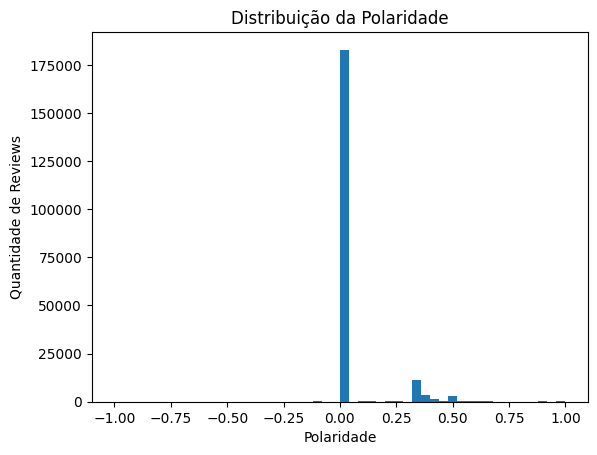

In [ ]:
# Visualizando a distribuição de sentimento
import matplotlib.pyplot as plt

plt.hist(df['polarity'], bins=50)

plt.title('Distribuição da Polaridade')
plt.xlabel('Polaridade')
plt.ylabel('Quantidade de Reviews')

plt.show()

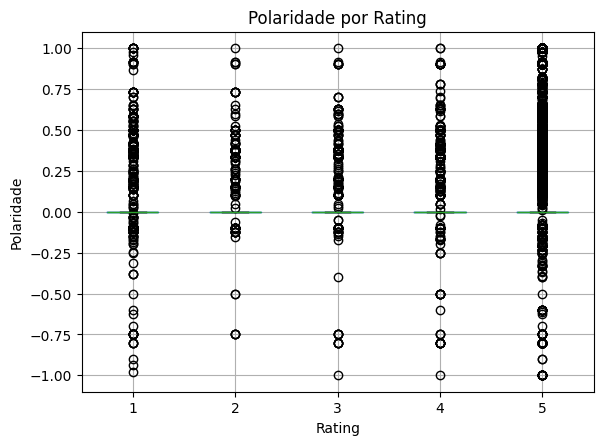

In [ ]:
# Boxplot da polaridade por rating
df.boxplot(column='polarity', by='rating')

plt.title('Polaridade por Rating')
plt.suptitle('')
plt.xlabel('Rating')
plt.ylabel('Polaridade')
plt.show()

In [ ]:
# Detectando inconsistências entre rating e texto
inconsistentes = df[
    ((df['rating'] >= 4) & (df['polarity'] < 0)) |
    ((df['rating'] <= 2) & (df['polarity'] > 0))
]

print('Inconsistentes:',len(inconsistentes))
print('%:',round(len(inconsistentes)/len(df)*100,2))

Inconsistentes: 1442
%: 0.7


In [ ]:
inconsistentes[['rating','polarity','content']].head(10)

,rating,polarity,content
8,5,-0.60000,Se fizer direitinho o cabelo fica muito bom de...
678,1,0.15000,Depois que seca o cabelo volta ao normal.
914,1,0.37500,Acredito que não seja original. O shampoo deix...
1040,2,0.15625,"Confesso que esperava mais do produto, por con..."
1360,5,-0.10000,"Produto ótimo, recomendo, cheirinho , e qualid..."
1413,1,0.37500,Eu acho que meu produto não é original não mes...
1641,1,0.37500,Não acredito ser original.
1680,4,-0.10000,Eu gostei só que a propaganda engana não alcan...
1710,1,0.37500,"Uso sempre esse kit, só que dessa vez me decep..."
2169,2,0.10000,Produto anuncia mel natural mas não tem mel em...


Esses casos podem ocorrer por vários motivos:
- sarcasmo
- ironia
- erro do modelo
- erro do usuário ao dar a nota

Essa análise é útil em sistemas de detecção de inconsistência em feedbacks, que podem indicar problemas na coleta de avaliações ou limitações do modelo de NLP.

In [ ]:
# Reviews muito curtos (bom, ok, ruim)
df['tamanho_review'] = df['content'].str.split().str.len()
df['review_curta'] = df['tamanho_review'] < 2

In [ ]:
df.loc[df['review_curta']==True].sample(5)

,date,rating,content,product_url,polarity,subjectivity,sentimento,tamanho_review,review_curta
96997,09 set. 2024,5,Excelente.,https://www.mercadolivre.com.br/condicionador-...,0.0,0.0,neutro,1,True
154432,05 ago. 2024,5,Maravilhoso.,https://www.mercadolivre.com.br/kit-sige-hidra...,0.0,0.0,neutro,1,True
19414,30 dez. 2024,5,Gostei.,https://www.mercadolivre.com.br/nivea-sun-prot...,0.0,0.0,neutro,1,True
121797,14 jan. 2025,5,,https://www.mercadolivre.com.br/tio-nacho-efei...,0.0,0.0,neutro,0,True
139317,05 out. 2024,5,Maravilhoso.,https://www.mercadolivre.com.br/mascara-hidrat...,0.0,0.0,neutro,1,True


## Detecção de temas (Topic Detection)

A **detecção de temas** é uma tarefa de NLP cujo objetivo é identificar **quais assuntos principais aparecem em um conjunto de textos**. Diferente da análise de sentimento, que mede a emoção de um texto, a detecção de temas busca descobrir **sobre o que as pessoas estão falando**.

Esse tipo de análise é muito útil em contextos como:

* entender **principais reclamações de clientes**
* descobrir **padrões em feedbacks**
* identificar **assuntos recorrentes em reviews**
* resumir grandes volumes de texto

Por exemplo, em reviews de produtos podem surgir temas como:

| Tema        | Exemplos de palavras        |
| ----------- | --------------------------- |
| entrega     | delivery, shipping, arrived |
| qualidade   | quality, material, durable  |
| preço       | price, expensive, cheap     |
| atendimento | service, support            |

A grande vantagem é que esses temas podem ser **descobertos automaticamente**, sem precisar rotular os dados manualmente.

---

## Como a detecção de temas é feita

A abordagem mais clássica é chamada **modelagem de tópicos (Topic Modeling)**. Ela tenta identificar **grupos de palavras que aparecem frequentemente juntas**, formando um tema.

Um dos algoritmos mais conhecidos é o **Latent Dirichlet Allocation**, normalmente chamado de **LDA**.

A ideia do algoritmo é:

1. cada documento possui **uma mistura de temas**
2. cada tema possui **um conjunto de palavras mais prováveis**

Por exemplo:

**Tema 1 – entrega**

```
delivery, arrived, shipping, days
```

**Tema 2 – qualidade**

```
quality, material, durable, product
```

Para implementar isso em Python normalmente usamos bibliotecas como:

* **scikit-learn**
* **gensim**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
import nltk

In [ ]:
# baixar stopwords (executar apenas uma vez)
nltk.download('stopwords')

# stopwords em português
stopwords_pt = stopwords.words('portuguese')

# 1. Vetorização do texto - BoW
vetorizador = CountVectorizer(
    stop_words=stopwords_pt,
    max_features=1000
)

matriz_texto = vetorizador.fit_transform(df['content'])

In [ ]:
# 2. Treinar o modelo de tópicos
modelo_lda = LatentDirichletAllocation(
    n_components=5,
    random_state=42
)

modelo_lda.fit(matriz_texto)

In [ ]:
# 3. Visualizar palavras de cada tema
palavras = vetorizador.get_feature_names_out()

for indice_tema, tema in enumerate(modelo_lda.components_):

    principais_palavras = [palavras[i] for i in tema.argsort()[-10:]]

    print(f"Tema {indice_tema+1}")
    print(principais_palavras)
    print()

Tema 1
['máscara', 'shampoo', 'maravilhosa', 'bastante', 'tempo', 'melhor', 'cabelos', 'uso', 'gostei', 'ótimo']

Tema 2
['top', 'comprar', 'ótimo', 'perfeito', 'super', 'recomendo', 'amei', 'excelente', 'maravilhoso', 'produto']

Tema 3
['brilho', 'cheiro', 'ficou', 'super', 'cheiroso', 'fica', 'macio', 'bem', 'deixa', 'cabelo']

Tema 4
['vez', 'resultado', 'usar', 'veio', 'comprei', 'ainda', 'usei', 'pra', 'cabelo', 'produto']

Tema 5
['otimo', 'perfume', 'boa', 'ótima', 'original', 'recomendo', 'cheiro', 'qualidade', 'produto', 'bom']

In [ ]:
# 4. Identificar tema principal de cada review
matriz_temas = modelo_lda.transform(matriz_texto)

df['tema_principal'] = matriz_temas.argmax(axis=1)

In [ ]:
df = pd.read_csv('/content/review_com_tema.csv')

In [ ]:
# 5. Quantidade de reviews por tema
df['tema_principal'].value_counts().reset_index()

,tema_principal,count
0,1,54225
1,4,42072
2,0,40188
3,3,38269
4,2,32198


In [ ]:
# 6. Sentimento médio por tema
df.groupby('tema_principal')['polarity'].mean().reset_index()

,tema_principal,polarity
0,0,0.015613
1,1,0.063674
2,2,0.067277
3,3,0.037254
4,4,0.026696


In [ ]:
# Rating médio por tema
df.groupby('tema_principal')['rating'].mean().reset_index()

,tema_principal,rating
0,0,4.817757
1,1,4.952937
2,2,4.680850
3,3,4.253887
4,4,4.697994


## Análise de emoção

A **análise de emoção** é uma tarefa de Processamento de Linguagem Natural (NLP) cujo objetivo é identificar **quais emoções estão expressas em um texto**. Diferente da análise de sentimento, que normalmente classifica textos apenas como **positivos, negativos ou neutros**, a análise de emoção busca identificar **categorias emocionais mais específicas**.

Entre as emoções mais comuns utilizadas em modelos e datasets estão:

* alegria
* tristeza
* raiva
* medo
* surpresa
* nojo

Por exemplo:

| Texto                                     | Emoção   |
| ----------------------------------------- | -------- |
| "Estou muito feliz com o produto."        | alegria  |
| "Esse produto é horrível."                | raiva    |
| "Fiquei muito decepcionado com a compra." | tristeza |

A análise de emoção permite uma compreensão mais profunda das reações humanas, sendo útil para identificar **nuances emocionais que não aparecem em classificações simples de sentimento**.

Essa técnica é aplicada em diversos contextos, como:

* análise de feedback de clientes
* monitoramento de redes sociais
* estudos de comportamento do consumidor
* análise de interações em atendimento ao cliente

Nos últimos anos, a análise de emoção passou a ser realizada principalmente com modelos baseados em **Transformers**, que conseguem capturar melhor o contexto das frases e distinguir diferentes tipos de emoções em textos.

Bibliotecas como a da **Hugging Face** permitem utilizar modelos pré-treinados para identificar automaticamente emoções em grandes volumes de texto, tornando esse tipo de análise acessível em projetos de ciência de dados e aplicações de NLP.


In [ ]:
# Instalar bibliotecas necessárias
!pip install transformers torch

# Importar bibliotecas
from transformers import pipeline
import pandas as pd

In [ ]:
# Carregar modelo de emoção que suporta português
classificador_emocao = pipeline(
    task="text-classification",
    model="bhadresh-savani/distilbert-base-uncased-emotion",
    return_all_scores=True
)

In [ ]:
def detectar_emocao(texto):
    texto = str(texto)[:512]
    resultados = classificador_emocao(texto)[0]
    emocao = max(resultados, key=lambda x: x['score'])
    return emocao['label']

In [ ]:
# Aplicar a uma amostra do dataframe
df_demo = df.sample(200, random_state=42).copy()

resultados = classificador_emocao(
    df_demo['content'].astype(str).tolist()
)

df_demo['emocao'] = [r['label'] for r in resultados]

In [ ]:
df_demo = pd.read_csv('/content/amostra_review_com_emocao.csv')

In [ ]:
df_demo[['content','emocao']].sample(5)

,content,emocao
193,Adorei meu cabelo tava uma espiga passei fico ...,joy
186,"Já é a segunda compra , minha filha que usa ,d...",joy
114,Bom produto.,joy
135,Caixa veio aberta e derramou o produto.,joy
60,Excelente produto.,joy


In [ ]:
df_demo['emocao'].value_counts().reset_index()

,emocao,count
0,joy,132
1,anger,63
2,fear,4
3,sadness,1


Mesmo quando o modelo foi treinado em inglês, modelos baseados em BERT ou derivados costumam funcionar razoavelmente bem em português devido à similaridade semântica capturada pelos embeddings. Para melhor desempenho em português, também podem ser utilizados modelos multilíngues disponíveis na biblioteca Hugging Face.

# Similaridade

In [2]:
import pandas as pd

In [10]:
# Tokenização simples (sem libs pesadas)
import re

def tokenize(text):
    # mantém só letras
    text = re.sub(r"[^a-záàâãéèêíïóôõöúçñ\s]", "", text)
    tokens = text.split()
    return tokens

df["tokens"] = df["content"].apply(tokenize)

In [11]:
# Removendo stopwords (português)
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
stopwords_pt = set(stopwords.words("portuguese"))
df["tokens_limpos"] = df["tokens"].apply(
    lambda tokens: [t for t in tokens if t not in stopwords_pt]
)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [12]:
df.head()

,date,rating,content,product_url,tokens,tokens_limpos
0,09 set. 2023,5,Top.,https://produto.mercadolivre.com.br/MLB-314957...,[op],[op]
1,19 ago. 2024,5,"Produto bom, cumpre o que promete.",https://produto.mercadolivre.com.br/MLB-314957...,"[roduto, bom, cumpre, o, que, promete]","[roduto, bom, cumpre, promete]"
2,15 fev. 2025,5,Ótima qualidade.,https://produto.mercadolivre.com.br/MLB-314957...,"[tima, qualidade]","[tima, qualidade]"
3,11 fev. 2025,4,Bom.,https://produto.mercadolivre.com.br/MLB-314957...,[om],[om]
4,10 jan. 2025,5,Atendeu minhas expectativas.,https://produto.mercadolivre.com.br/MLB-314957...,"[tendeu, minhas, expectativas]","[tendeu, expectativas]"


In [13]:
# Função de similaridade (Jaccard)
def similaridade_jaccard(tokens1, tokens2):
    set1, set2 = set(tokens1), set(tokens2)
    return len(set1 & set2) / len(set1 | set2)

In [14]:
i, j = 11, 20

df.loc[i, "content"], df.loc[j, "content"]

('Tudo de bom! gostei! eu recomendo.',
 'Gostei bastante idrata da brilho! o cheiro da idratação e meio forte lembra uma progressiva! mas estou gostando do resultado pretendo comprar mais produto da linha.')

In [15]:
similaridade_jaccard(
    df.loc[i, "tokens_limpos"],
    df.loc[j, "tokens_limpos"]
)

0.0

In [16]:
# Comparando vários textos com um base
idx_base = 11

df["simples_sim"] = df["tokens_limpos"].apply(
    lambda x: similaridade_jaccard(
        df.loc[idx_base, "tokens_limpos"], x
    )
)

In [17]:
df.sort_values("simples_sim", ascending=False).head(5)[
    ["rating", "simples_sim", "content"]
]

,rating,simples_sim,content
11,5,1.00,Tudo de bom! gostei! eu recomendo.
79899,5,0.75,E muito bom gostei recomendo.
94666,5,0.75,Tudo de bom! recomendo 😊.
29189,5,0.75,É muito bom gostei recomendo!❤️.
144983,5,0.60,Eu recomendo gostei muito bom.


Cosine Similarity mede o ângulo entre dois vetores.
Quanto mais alinhados, mais parecidos os textos.

1.0 → textos muito parecidos

0.0 → textos diferentes

📌 Não importa o tamanho do texto, importa a direção.

Por que não usar Jaccard sempre?

| Jaccard           | Cosine                |
| ----------------- | --------------------- |
| palavras iguais   | pesos das palavras    |
| ignora frequência | considera importância |
| simples           | mais robusto          |
| bom p/ explicar   | bom p/ produção       |

In [20]:
from nltk.corpus import stopwords

stopwords_pt = stopwords.words("portuguese")  # já é list

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(
    stop_words=stopwords_pt,  # LISTA
    min_df=5
)

In [22]:
X_tfidf = tfidf_vectorizer.fit_transform(df["content"])

In [23]:
X_tfidf.shape

(206952, 6802)

In [24]:
# Vocabulário TF-IDF
vocab_tfidf = tfidf_vectorizer.get_feature_names_out()
vocab_tfidf[:20]

array(['00', '000', '01', '02', '03', '04', '05', '06', '07', '09', '10',
       '100', '1000', '10000', '100000', '1000000', '100g', '100ml',
       '10min', '10ml'], dtype=object)

In [25]:
# Importando cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

In [27]:
i, j = 11, 20

print(df.loc[i, "content"])
print(df.loc[j, "content"])

Tudo de bom! gostei! eu recomendo.
Gostei bastante idrata da brilho! o cheiro da idratação e meio forte lembra uma progressiva! mas estou gostando do resultado pretendo comprar mais produto da linha.


In [28]:
cosine_similarity(
    X_tfidf[i],
    X_tfidf[j]
)[0][0]

np.float64(0.07180956523736445)

In [29]:
idx_base = 11
df.loc[idx_base, "content"]

'Tudo de bom! gostei! eu recomendo.'

In [30]:
#similaridade
similaridades = cosine_similarity(
    X_tfidf[idx_base],
    X_tfidf
)[0]

In [31]:
# Ordenando Resultados
df_sim = (
    df.assign(similaridade=similaridades)
      .sort_values("similaridade", ascending=False)
)

# Reviews mais parecidos
df_sim.iloc[1:6][["rating", "similaridade", "content"]]

,rating,similaridade,content
94666,5,0.877802,Tudo de bom! recomendo 😊.
6802,5,0.877802,Tudo de bom. Recomendo.
13941,5,0.830025,Esse produto é tudo de bom.\nEu recomendo.
50083,5,0.780823,"Tudo de bom, amei. Recomendo."
51179,4,0.769854,Não é tudo aquilo no meu cabelo não gostei.


In [33]:
# Busca por um texto
query = "produto chegou com defeito"
query_vec = tfidf_vectorizer.transform([query])

sim_query = cosine_similarity(query_vec, X_tfidf)[0]

In [34]:
df_query = (
    df.assign(similaridade=sim_query)
      .sort_values("similaridade", ascending=False)
)

df_query.head(10)[["rating", "similaridade", "content"]]

,rating,similaridade,content
108303,1,1.000000,Produto com defeito.
151510,5,0.962960,0 defeito.
58179,1,0.838288,Veio com defeito.
206233,3,0.838288,Veio com defeito.
51989,5,0.834047,Produto excelente mas veio com a vólvula com d...
150414,5,0.767869,"Não tem nenhum defeito , produto ótimo!."
83184,5,0.665884,Maravilhoso !!!.\nZero defeito.
131947,3,0.649311,Produto veio com defeito na válvula.
21283,5,0.648137,Perfeito. Zero defeito.
86493,1,0.647407,Produto veio com defeito aguado não gostei.


In [35]:
df_teste = pd.read_csv('/content/review_com_tema.csv')

In [45]:
df_teste.iloc[[51989,131947,21283,86493]]

,date,rating,content,product_url,polarity,subjectivity,sentimento,review_suspeita,tamanho_review,review_curta,sentimento_extremo,tema_principal
51989,05 jul. 2023,5,Produto excelente mas veio com a vólvula com d...,https://www.mercadolivre.com.br/night-spa-seru...,0.0,0.0,neutro,False,9,False,False,1
131947,28 dez. 2024,3,Produto veio com defeito na válvula.,https://produto.mercadolivre.com.br/MLB-123196...,0.0,0.0,neutro,False,6,False,False,3
21283,25 jan. 2025,5,Perfeito. Zero defeito.,https://www.mercadolivre.com.br/oleo-pinga-cen...,0.0,0.0,neutro,False,3,False,False,1
86493,26 mar. 2024,1,Produto veio com defeito aguado não gostei.,https://www.mercadolivre.com.br/progressiva-za...,0.0,0.0,neutro,False,7,False,False,3


## Classificação de texto

A **classificação de texto** é uma tarefa de Processamento de Linguagem Natural (NLP) cujo objetivo é **atribuir categorias ou rótulos a um texto automaticamente**. Diferente da detecção de temas, que busca descobrir padrões de forma não supervisionada, a classificação de texto normalmente utiliza **dados previamente rotulados** para treinar um modelo capaz de prever a categoria de novos textos.

Esse tipo de técnica é amplamente utilizado em aplicações como:

* classificação de **emails em spam ou não spam**
* categorização de **notícias por assunto**
* classificação de **tickets de suporte**
* identificação de **intenções em chatbots**
* categorização de **comentários ou reviews**

Por exemplo:

| Texto                                           | Categoria             |
| ----------------------------------------------- | --------------------- |
| "O produto chegou rápido e funciona muito bem." | avaliação positiva    |
| "Demorou muito para chegar."                    | problema de entrega   |
| "O material parece frágil."                     | problema de qualidade |

Para que um modelo consiga realizar essa tarefa, o texto precisa primeiro ser transformado em uma **representação numérica**. Algumas técnicas comuns incluem:

* **Bag of Words**
* **TF-IDF**
* **embeddings de palavras ou sentenças**

Após essa transformação, algoritmos de machine learning podem ser treinados para aprender a relação entre o texto e sua categoria. Modelos clássicos como regressão logística, Naive Bayes e SVM são frequentemente utilizados com a biblioteca **scikit-learn**.

Mais recentemente, modelos baseados em **Transformers**, como **BERT**, passaram a ser amplamente utilizados para tarefas de classificação de texto, pois conseguem capturar melhor o contexto das palavras dentro de uma frase. Esses modelos podem ser utilizados de forma simples através da biblioteca **Hugging Face**, que disponibiliza diversos modelos pré-treinados para diferentes tarefas de NLP.

A classificação de texto é considerada uma das tarefas mais fundamentais de NLP e serve como base para diversas aplicações em ciência de dados, inteligência artificial e análise de grandes volumes de texto.

In [46]:
# Bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [47]:
# 1. Criar a variável alvo baseada no rating
def classificar_rating(r):
    if r <= 2:
        return "negativo"
    elif r == 3:
        return "neutro"
    else:
        return "positivo"

df['classe_sentimento'] = df['rating'].apply(classificar_rating)

In [48]:
# 2. Separar texto e variável alvo
X = df['content'].astype(str)
y = df['classe_sentimento']

In [49]:
# 3. Dividir em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

In [50]:
# 4. Vetorização do texto usando TF-IDF
vetorizador = TfidfVectorizer(
    max_features=5000,
    stop_words=None
)

X_treino_vet = vetorizador.fit_transform(X_treino)
X_teste_vet = vetorizador.transform(X_teste)

In [51]:
# 5. Treinar o modelo
modelo = LogisticRegression(max_iter=1000)

modelo.fit(X_treino_vet, y_treino)

LogisticRegression(max_iter=1000)

In [52]:
# 6. Fazer previsões
predicoes = modelo.predict(X_teste_vet)

In [53]:
# 7. Avaliar modelo
print("Accuracy:", accuracy_score(y_teste, predicoes))
print("\nRelatório de classificação:")
print(classification_report(y_teste, predicoes))

Accuracy: 0.9473315455050615

Relatório de classificação:
              precision    recall  f1-score   support

    negativo       0.71      0.61      0.66      1956
      neutro       0.38      0.07      0.12      1196
    positivo       0.96      0.99      0.98     38239

    accuracy                           0.95     41391
   macro avg       0.69      0.56      0.58     41391
weighted avg       0.93      0.95      0.94     41391



In [54]:
# 8. Testar com um novo texto

texto = ['Gostei muito, indico.']

texto_vet = vetorizador.transform(texto)

modelo.predict(texto_vet)

array(['positivo'], dtype=object)

In [55]:
texto = ['Até que é bom.']

texto_vet = vetorizador.transform(texto)

modelo.predict(texto_vet)

array(['positivo'], dtype=object)

In [56]:
texto = ['Nada a declarar']

texto_vet = vetorizador.transform(texto)

modelo.predict(texto_vet)

array(['negativo'], dtype=object)

In [57]:
texto = ['Neutro']

texto_vet = vetorizador.transform(texto)

modelo.predict(texto_vet)

array(['positivo'], dtype=object)

In [58]:
texto = ['Péssimo produto, odiei o cheiro.']

texto_vet = vetorizador.transform(texto)

modelo.predict(texto_vet)

array(['negativo'], dtype=object)

## 1. Segurança e Compliance

* **Detecção de phishing em e-mails** (classificar risco do email automaticamente)
* **Identificação de malware em anexos ou links**
* **Detecção de vazamento de dados sensíveis** (CPF, senha, chave API)
* **Análise de comportamento suspeito em login**
* **Classificação de e-mails suspeitos em helpdesk de TI**

## 2. Processamento de Texto

* **Detecção de palavras ofensivas ou discurso de ódio**
* **Classificação automática de e-mails** (suporte, financeiro, comercial)
* **Extração de informações de contratos** (datas, valores, partes)
* **Resumo automático de documentos**
* **Tradução automática de mensagens**

## 3. Automação de Atendimento

* **Classificação automática de tickets**
* **Resposta automática para perguntas frequentes**
* **Análise de sentimento de clientes**
* **Detecção de urgência em chamados**
* **Sugestão de resposta para atendimento**

## 4. Operações e Negócios

* **Análise automática de feedback de clientes**
* **Extração de dados de notas fiscais**
* **Monitoramento de reputação da marca**
* **Classificação de leads comerciais**
* **Identificação de churn em comentários de clientes**

## 5. Dados e Engenharia de Dados

* **Normalização de nomes de empresas ou escolas**
* **Detecção de duplicidade de registros**
* **Correção automática de dados inconsistentes**
* **Classificação de categorias de produtos**
* **Validação semântica de dados**

## 6. Educação (pode ser interessante no seu setor)

* **Correção automática de redações**
* **Análise de dificuldade de questões**
* **Identificação de plágio em trabalhos**
* **Extração de temas recorrentes em avaliações**
* **Detecção de risco de evasão escolar em comentários**

---

💡 **Ideias mais avançadas (usando LLM + automação):**

* **Transformar emails em tickets estruturados**
* **Extrair tarefas de reuniões**
* **Criar relatórios automáticos a partir de dados**
* **Classificar documentos automaticamente**
* **Gerar insights de mercado a partir de notícias**